# Lesson I

## Reading date and time data in Pandas

In this chapter, you will use the Pandas library to work with dates and times. You should have encountered Pandas before, but now we will add datetimes to the mix.

### A simple Pandas example

To start with, let's load data with Pandas. First, we *import pandas*, and as is customary we use the alias *pd*. 
Our data is in a csv file, so we load it with the ``read_csv()`` function. ``pd.read_csv()`` has one required argument, the name of the file to load, which in this case is ``capital-onebike.csv``. We save the result to the variable rides. Let's print the first three rows to see what we've got.

In [2]:
# Load Pandas
import pandas as pd
# Import W20529's rides in Q4 2017
rides = pd.read_csv('datasets/capital-onebike.csv')
# See our data
rides.head(3)

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual
2,2017-10-02 06:37:10,2017-10-02 06:42:53,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member


We can also select a particular column by using the brackets, as here where we call ``rides['Start date']``. And we can get a particular row with .``iloc[]``, in this case row number 2. Because we didn't tell Pandas to treat the start date and end date columns as datetimes, they are simply strings or objects. We want them to be datetimes so we can work with them effectively, using the tools from the first three chapters of this course.

In [3]:
rides['Start date']

0      2017-10-01 15:23:25
1      2017-10-01 15:42:57
2      2017-10-02 06:37:10
3      2017-10-02 08:56:45
4      2017-10-02 18:23:48
              ...         
285    2017-12-29 14:32:55
286    2017-12-29 15:08:26
287    2017-12-29 20:33:34
288    2017-12-30 13:51:03
289    2017-12-30 15:09:03
Name: Start date, Length: 290, dtype: object

In [4]:
rides.iloc[2]

Start date                               2017-10-02 06:37:10
End date                                 2017-10-02 06:42:53
Start station number                                   31036
Start station                  George Mason Dr & Wilson Blvd
End station number                                     31037
End station             Ballston Metro / N Stuart & 9th St N
Bike number                                           W20529
Member type                                           Member
Name: 2, dtype: object

### Loading datetimes with parse_dates

If we want Pandas to treat these columns as datetimes, we can make use of the argument ``parse_dates`` in ``.read_csv()``, and set it to be a list of column names, passed as strings. 
Now Pandas will read these columns and convert them for us to datetimes. 

Pandas will try and be intelligent and figure out the format of your datetime strings. In the rare case that this doesn't work, you can use the ``to_datetime()`` method that lets you specify the format manually. For more details, see the Pandas documentation.

In [5]:
# Import W20529's rides in Q4 2017
rides = pd.read_csv('datasets/capital-onebike.csv',
                    parse_dates= ['Start date', 'End date'])

# Or:
rides['Start date'] = pd.to_datetime(rides['Start date'],
                                     format= "%Y-%m-%d %H:%M:%S")


Now when we again ask for the Start date for row 2, we get back a *Pandas Timestamp*, which for essentially all purposes you can imagine is a Python Datetime object with a different name. They behave basically exactly the same.

In [6]:
# Select Start date for row 2
rides['Start date'].iloc[2]

Timestamp('2017-10-02 06:37:10')

### Timezone-aware arithmetic

Since our ``Start date`` and ``End date`` columns are now ``datetimes``, we can deal with them the way we usually deal with datetimes. 
For example, we can create a new column, ``Duration``, by subtracting ``Start date`` from ``End date``. 
Because each of these columns are datetimes, when we subtract them we get ``timedeltas``. 

If we print out the first 5 rows, we get that the first ride lasted for only 3 minutes and 1 second, the second ride lasted for 2 hours and 7 minutes, the third ride lasted for 5 minutes 43 seconds, and so on.

In [7]:
# Create a duration column
rides['Duration'] = rides['End date'] - rides['Start date']
# Print the first 5 rows
rides['Duration'].head()    

0   0 days 00:03:01
1   0 days 02:07:02
2   0 days 00:05:43
3   0 days 00:21:18
4   0 days 00:21:17
Name: Duration, dtype: timedelta64[ns]

### Loading datetimes with parse_dates

Pandas has two features worth noting here. Let's see an example of converting our ``Duration`` to *seconds*, and looking at the first 5 rows. 

First, Pandas code is often written in a *"method chaining"* style, where we call a *method, and then another, and then another*. 

For readability, it's common to break them up with a backslash('\') and a linebreak at the end of each. 
Second, you can access all of the typical datetime methods within the namespace ``.dt.`` For example, we can convert our timedeltas into numbers with ``.dt.total_seconds()``. 

Now when we look at the results, we see that we've got seconds instead of timedeltas. Our first ride lasted 181 seconds, our second ride 7622 seconds, and so on.

In [8]:
rides['Duration']\
    .dt.total_seconds()\
        .head()

0     181.0
1    7622.0
2     343.0
3    1278.0
4    1277.0
Name: Duration, dtype: float64

# Lesson II

## Summarizing datetime data in Pandas

In this lesson, we will discuss how to summarize Pandas tables, especially when we have datetime columns.

First things first, let's review some general principles for summarizing data in Pandas. You can call ``.mean()``, ``.median()``, ``.sum()`` and so on, on any column where it makes sense.
 
 
For example, ``rides['Duration'].mean()`` returns that the average time the bike was out of the dock was *19 minutes and 38 seconds*. 

In [9]:
# Average time out of dock
rides['Duration'].mean()

Timedelta('0 days 00:19:38.931034482')

We also can ask: how much is this column in total? By using the ``.sum()`` method, we can see that the bike was out of the dock for a total of *3 days, 22 hours, 58 minutes and 10 seconds* during this time period.

In [10]:
# Total time out of the dock
rides['Duration'].sum()

Timedelta('3 days 22:58:10')

The output of Pandas operations mix perfectly well with the rest of Python. For example, if we divide this sum by *91* days (the number of days from October 1 to December 31), we see that the bike was out about 4.3% of the time, meaning about 96% of the time the bike was in the dock.

In [11]:
from datetime import timedelta
# Percent of time out of the dock
rides['Duration'].sum() / timedelta(days=91)

0.04348417785917786

For non-numeric columns, we have other ways of making summaries. The ``.value_counts()`` method tells us how many times a given value appears. In this case, we want to know how often the Member type is Member or Casual.

In [12]:
# Count how many time the bike started at each station
rides['Member type'].value_counts()

Member    236
Casual     54
Name: Member type, dtype: int64

236 rides were from Members, and 54 were from Casual riders, who bought a ride at the bike kiosk without a membership. 

We can also divide by the total number of rides, using ``len(rides)``, and Pandas handles the division for us across our result. 

*81.4%* of rides were from members, whereas *18.6%* of rides were from casual riders.

In [13]:
# Percent of rides by member
rides['Member type'].value_counts() / len(rides)

Member    0.813793
Casual    0.186207
Name: Member type, dtype: float64

To make this next section easy, let's make a column called ``'Duration seconds'``, which will be the original column ``'Duration'`` converted to seconds. 

Pandas has powerful ways to group rows together. First, we can group by values in any column, using the ``.groupby()`` method. ``.groupby()`` takes a column name and does all subsequent operations on each group. 

For example, we can groupby Member type, and ask for the mean duration in seconds for each member type. Rides from casual members last nearly twice as long on average.

In [14]:
# Add duration (in seconds) column
rides['Duration seconds'] = rides['Duration'].dt.total_seconds()
# Average duration per member type
rides.groupby('Member type')['Duration seconds'].mean()

Member type
Casual    1994.666667
Member     992.279661
Name: Duration seconds, dtype: float64

Second, we can also group by time, using the ``.resample()`` method. ``.resample()`` takes a unit of time (for example, ``'M'`` for month), and a datetime column to group on, in this case ``'Start date'``. 

From this we can see that, in the month ending on October 31st, average rides were 1886 seconds, or about 30 minutes, whereas for the month ending December 31, average rides were 635 seconds, or closer to ten minutes.

In [15]:
# Average duration by month
rides.resample('M', on= 'Start date')['Duration seconds'].mean()

Start date
2017-10-31    1886.453704
2017-11-30     854.174757
2017-12-31     635.101266
Freq: M, Name: Duration seconds, dtype: float64

There are also others methods which operate on groups. For example, we can call ``.size()`` to get the size of each group. 

In [16]:
# Size per group
rides.groupby('Member type').size()

Member type
Casual     54
Member    236
dtype: int64

Or we can call ``.first()`` to get the first row of each group.

In [17]:
# First ride per group
rides.groupby('Member type').first()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Duration,Duration seconds
Member type,,,,,,,,,
Casual,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,0 days 02:07:02,7622.0
Member,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,0 days 00:03:01,181.0


Pandas also makes it easy to plot results. Just add the ``.plot()`` method at the end of your call and it will pass the results to the Python plotting library *Matplotlib*. 

It will usually have sensible defaults, though if you want to change things further you can

<AxesSubplot:xlabel='Start date'>

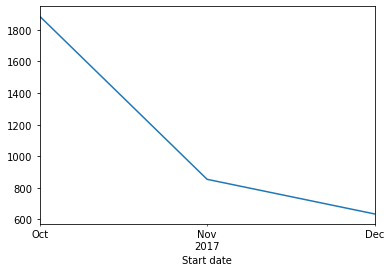

In [18]:
rides\
    .resample('M', on= 'Start date')\
        ['Duration seconds']\
            .mean()\
                .plot()

We can also change the resampling rate from ``'M'`` for months to ``'D'`` for days, and plot again... 

<AxesSubplot:xlabel='Start date'>

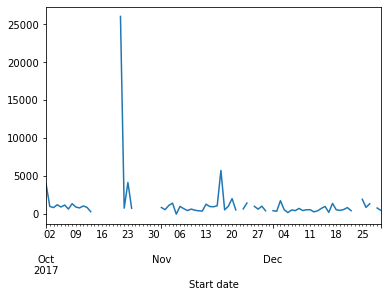

In [19]:
rides\
    .resample('D', on= 'Start date')\
        ['Duration seconds']\
            .mean()\
                .plot()

Now we can see that there is at least one big outlier skewing our data: some ride in the middle of October was 25000 seconds long, or nearly 7 hours. 

We identified this ride in an earlier chapter as possibly a bike repair. Now we can see that it happened after many days with zero rides, which lends strength to that idea. 

If the bike was broken and sitting in the dock for awhile, eventually it would have been removed for repairs, then returned.

## Exercise

### How many joyrides?

Suppose you have a theory that some people take long bike rides before putting their bike back in the same dock. Let's call these rides "joyrides".

You only have data on one bike, so while you can't draw any bigger conclusions, it's certainly worth a look.

Are there many joyrides? How long were they in our data set? Use the median instead of the mean, because we know there are some very long trips in our data set that might skew the answer, and the median is less sensitive to outliers.

In [22]:
# Create joyrides
joyrides = (rides['Start station'] == rides['End station'])

# Total number of joyrides
print("{} rides were joyrides".format(joyrides.sum()))

# Median of all rides
print("The median duration overall was {:.2f} seconds"\
      .format(rides['Duration seconds'].median()))

# Median of joyrides
print("The median duration for joyrides was {:.2f} seconds"\
      .format(rides[joyrides]['Duration seconds'].median()))

6 rides were joyrides
The median duration overall was 660.00 seconds
The median duration for joyrides was 2642.50 seconds


### It's getting cold outside, W20529

Washington, D.C. has mild weather overall, but the average high temperature in October (68ºF / 20ºC) is certainly higher than the average high temperature in December (47ºF / 8ºC). People also travel more in December, and they work fewer days so they commute less.

How might the weather or the season have affected the length of bike trips?

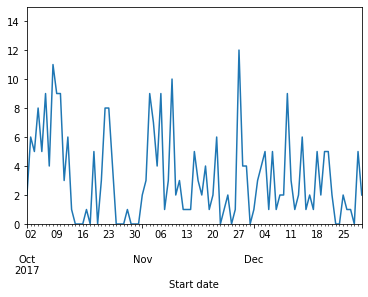

In [23]:
# Import matplotlib
import matplotlib.pyplot as plt

# Resample rides to daily, take the size, plot the results
rides.resample('D', on = 'Start date')\
  .size()\
  .plot(ylim = [0, 15])

# Show the results
plt.show()

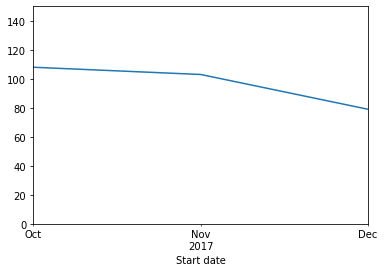

In [24]:
# Import matplotlib
import matplotlib.pyplot as plt

# Resample rides to monthly, take the size, plot the results
rides.resample('M', on = 'Start date')\
  .size()\
  .plot(ylim = [0, 150])

# Show the results
plt.show()

### Members vs. casual riders over time

Riders can either be ``"Members"``, meaning they pay yearly for the ability to take a bike at any time, or ``"Casual"``, meaning they pay at the kiosk attached to the bike dock.

Do members and casual riders drop off at the same rate over October to December, or does one drop off faster than the other?

In [25]:
# Resample rides to be monthly on the basis of Start date
monthly_rides = rides.resample('M', on= 'Start date')['Member type']

# Take the ratio of the .value_counts() over the total number of rides
print(monthly_rides.value_counts() / monthly_rides.size())

Start date  Member type
2017-10-31  Member         0.768519
            Casual         0.231481
2017-11-30  Member         0.825243
            Casual         0.174757
2017-12-31  Member         0.860759
            Casual         0.139241
Name: Member type, dtype: float64


### Combining groupby() and resample()

A very powerful method in Pandas is ``.groupby()``. Whereas ``.resample()`` groups rows by some time or date information, ``.groupby()`` groups rows based on the values in one or more columns.

For example, ``rides.groupby('Member type').size()`` would tell us how many rides there were by member type in our entire DataFrame.

``.resample()`` can be called after ``.groupby()``. For example, how long was the median ride by month, and by Membership type?

In [27]:
# Group rides by member type, and resample to the month
grouped = rides.groupby('Member type')\
  .resample('M', on= 'Start date')

# Print the median duration for each group
print(grouped['Duration seconds'].median())

Member type  Start date
Casual       2017-10-31    1636.0
             2017-11-30    1159.5
             2017-12-31     850.0
Member       2017-10-31     671.0
             2017-11-30     655.0
             2017-12-31     387.5
Name: Duration seconds, dtype: float64


# Lesson III

## Additional datetime methods in Pandas

In this final lesson, we will cover some additional Pandas methods for working with dates and times. By the end of this lesson, you will understand how to handle timezones in Pandas, as well as other common datetime operations.

### Timezones in Pandas

First, a reminder of the importance of timezones. If we ask Pandas to tell us the smallest ride duration in seconds, using the ``dt.total_seconds()`` method and then the ``.min()`` method, 

we get *-3346 seconds, or -55 minutes*. 


In [28]:
rides['Duration'].dt.total_seconds().min()

-3346.0


**Yikes!** Something is wrong, since our ride durations shouldn't ever be negative.

The answer, as it was when we looked at this data set in standard Python, is Daylight Saving. Just like with standard Python, these datetime objects start off as timezone-naive. They're not tied to any absolute time with a UTC offset. 

Let's see the first three Start dates so we can see how they're displayed and check that there is no UTC offset. 
To start, we want those same three datetimes to be put into a timezone. 

In [29]:
rides['Start date'].head(3)

0   2017-10-01 15:23:25
1   2017-10-01 15:42:57
2   2017-10-02 06:37:10
Name: Start date, dtype: datetime64[ns]

The method for this in Pandas is ``dt.tz_localize()``. Now when we look at the localized datetimes, we can see that they have a UTC offset.

In [30]:
rides['Start date'].head(3)\
    .dt.tz_localize('America/New_York')

0   2017-10-01 15:23:25-04:00
1   2017-10-01 15:42:57-04:00
2   2017-10-02 06:37:10-04:00
Name: Start date, dtype: datetime64[ns, America/New_York]

However, if we try to convert our entire ``Start date`` column to the ``America/New_York`` timezone, Pandas will throw an ``AmbiguousTimeError``. 

In [ ]:
# Try to set a timezone...
rides['Start date'] = rides['Start date']\
    .dt.tz_localize('America/New_York')
    
## Will throw an AmbigousTimeError...    

As expected, we have one datetime that occurs during the Daylight Saving shift. Following the advice of the error message, we can set the ambiguous argument in the ``dt.tz_localize()`` method.

By default, it raises an error, as we saw before. We also can pass the string ``'NaT``', which says that if the converter gets confused, it should set the bad result as **Not a Time**. Pandas is smart enough to skip over NaTs when it sees them, so our ``.min()`` and other methods will just ignore this one row.

In [33]:
# Handle ambigous datetimes
rides['Start date'] = rides['Start date']\
    .dt.tz_localize('America/New_York', ambiguous='NaT')
    
rides['End date'] = rides['End date']\
    .dt.tz_localize('America/New_York', ambiguous='NaT')    

Now that we've fixed the timezones, we should recalculate our durations, in case any rides had been across Daylight Saving boundaries. 
This time, when we take Durations, convert it to seconds, and take the minimum, 

In [34]:
# Re-calculate duration, ignoring bad row
rides['Duration'] = rides['End date'] - rides['Start date']
# Find the minimum again
rides['Duration'].dt.total_seconds().min()

116.00000000000001

we get a much more sensible 116-point-0 seconds, or about two minutes.

Just to know what we're looking at, let's pull up our problematic row. Here, both the start and end time were ambiguous, so they've been set to NaT. As a result, our Duration, since it's the difference of two undefined times, is also NaT.

In [35]:
# Look at problematic row
rides.iloc[129]

Start date                        NaT
End date                          NaT
Start station number            31615
Start station           6th & H St NE
End station number              31627
End station             3rd & M St NE
Bike number                    W20529
Member type                    Member
Duration                          NaT
Duration seconds              -3346.0
Name: 129, dtype: object

### Other datetime operations in Pandas

There are other datetime operations you should know about too. The simplest are ones you're already familiar with: ``.year``, ``.month``, and so on. 

In Pandas, these are accessed with ``dt.year``, ``dt.month``, etc. For example, here is the year of the first three rows...

In [36]:
# Year of first three rows
rides['Start date']\
    .head(3)\
        .dt.year

0    2017
1    2017
2    2017
Name: Start date, dtype: int64

There are other useful things that Pandas gives you, some of which are not available in standard Python. 

For example, the method ``dt.day_name()`` gives you the day of the week for each element in a datetime Series. 

You can even specify if you want weekday names in a language other than English. These results can be aggregated with ``.groupby()`` call, to summarize data by year, month, day of the week, and so on.

In [37]:
# See weekdays for first three rides
rides['Start date']\
    .head(3)\
        .dt.day_name()

0    Sunday
1    Sunday
2    Monday
Name: Start date, dtype: object

### Other parts of Pandas

Pandas also lets you shift rows up or down with the ``.shift()`` method. Here we've shifted the rides one row forward so that our zeroth row is now NaT, and our first row has the same value that our zeroth row had before. 

This is useful if you want to, for example, line up the end times of each row with the start time of the next one. 

In [38]:
# Shift the indexes forward one, padding with NaT
rides['End date'].shift(1).head(3)

0                         NaT
1   2017-10-01 15:26:26-04:00
2   2017-10-01 17:49:59-04:00
Name: End date, dtype: datetime64[ns, America/New_York]

Now you can answer questions about how each ride compares to the previous one! You'll cover this in an exercise shortly.

## Exercise

### How long per weekday?

Pandas has a number of datetime-related attributes within the ``.dt`` accessor. Many of them are ones you've encountered before, like ``.dt.month``. Others are convenient and save time compared to standard Python, like ``.dt.day_name()``.

In [40]:
# Add a column for the weekday of the start of the ride
rides['Ride start weekday'] = rides['Start date'].dt.day_name()

# Print the median trip time per weekday
print(rides.groupby('Ride start weekday')['Duration seconds'].median())

Ride start weekday
Friday       724.5
Monday       810.5
Saturday     462.0
Sunday       917.0
Thursday     652.0
Tuesday      641.5
Wednesday    585.0
Name: Duration seconds, dtype: float64


### How long between rides?

For your final exercise, let's take advantage of Pandas indexing to do something interesting. How much time elapsed between rides?

In [41]:
# Shift the index of the end date up one; now subract it from the start date
rides['Time since'] = rides['Start date'] - (rides['End date'].shift(1))

# Move from a timedelta to a number of seconds, which is easier to work with
rides['Time since'] = rides['Time since'].dt.total_seconds()

# Resample to the month
monthly = rides.resample('M', on= 'Start date')

# Print the average hours between rides each month
print(monthly['Time since'].mean() /(60*60))

Start date
2017-10-31 00:00:00-04:00    5.519242
2017-11-30 00:00:00-05:00    7.256474
2017-12-31 00:00:00-05:00    9.202380
Name: Time since, dtype: float64
